<div class="titulo-capitulo" style="background-color: darkblue; color: white;">
    <br>
    <h1 class="centrado">Clase Laboratorio Nº3</h1> 
    <br>
<div style="text-align: left">Autor      : Fiorella Roco Parra&nbsp;&nbsp;&nbsp;&nbsp;</div>
<div style="text-align: left">Asignatura : Optimización&nbsp;&nbsp;&nbsp;&nbsp;</div>
<div style="text-align: left">Fecha      : 02.04.2024&nbsp;&nbsp;&nbsp;&nbsp;</div>
<div style="text-align: left">Correo     : froco.parra@gmail.com&nbsp;&nbsp;&nbsp;&nbsp;</div>
</div>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import time as time # En este caso lo utilzaremos para medir el tiempo.


<div class="titulo-capitulo" style="background-color: darkblue; color: white;">
    <br>
    <h1 class="centrado">I. Fuerza bruta</h1> 
    <br>
</div>

# Ejercicio I: Empresa de Telecomunicaciones

a. Una empresa de telecomunicaciones desea optimizar el ancho de banda asignado a sus diferentes servicios para maximizar la satisfacción del cliente. La función que representa la capacidad máxima en función del ancho de banda (en megabytes por segundo) asignado por servicio es: 

$𝑓(𝑥)=20𝑥−0.5𝑥^2$

donde 𝑥 es el ancho de banda asignado por servicio. Encuentra la asignación óptima de ancho de banda que maximiza la capacidad máxima por servicio.

b. Graficar los tiempos de ejecución del script de la diapositiva 7 para cada una de las siguientes iteraciones:

   [100, 200, 500, 1000, 2000, 10000, 100000, 1000000].

Para ello modifique el script anterior creando una lista de pasos e itere en esos pasos. Grafique los tiempos de ejecución respecto del tiempo.


# Solución

(a)

In [2]:
start_time =  time.perf_counter() # Inicio contedo del tiempo de cómputo

def function(x):
    return 20*x-0.5*x**2

start = 0 # Define el Incio el intervalo
stop = 30 # Define el Final del intervalo
num = 100 # Define la Cantidad de numeros a generar

x = np.linspace(start,stop,num) #Genera array de numeros donde 
#print(x)–
y = function(x) # evaluamos x en la función

value = -np.inf # Definición valor inicial para comparar
#               --> Nota: representa a un valor infinito. Generalmete es utilizado para realizar comparaciones.
for a1 in x:
    val_fun = function(a1)
    if val_fun > value:
        value = val_fun
        parameters = [round(a1), round(value)] # valor de x, valor f(x) 
        
total_time =  time.perf_counter() - start_time # calculo del tiempo de cómputo

print("Solution =", parameters, end="\n\n")
print(f"R//La asignación óptima es {parameters[0]} megabytes por segundo por servicio con una capacidad máxima de {parameters[1]} megabytes por segundo por servicio ofrecido.", end = "\n\n")
print("El tiempo de cómputo es", round(total_time,4), "segundos.")

Solution = [20, 200]

R//La asignación óptima es 20 megabytes por segundo por servicio con una capacidad máxima de 200 megabytes por segundo por servicio ofrecido.

El tiempo de cómputo es 0.0007 segundos.


In [3]:
total_time

0.0007177000006777234

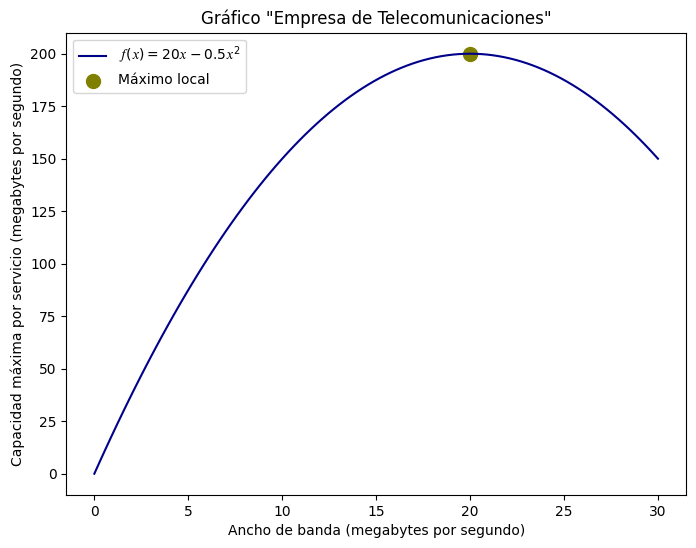

In [4]:
plt.figure(figsize=(8,6))
plt.plot(x,y, color = "darkblue", label='$𝑓(𝑥)=20𝑥−0.5𝑥^2$')
plt.scatter(parameters[0],parameters[1], s=100, color = "olive", label = "Máximo local")

plt.title('Gráfico "Empresa de Telecomunicaciones"')
plt.xlabel('Ancho de banda (megabytes por segundo)')
plt.ylabel('Capacidad máxima por servicio (megabytes por segundo)')

plt.legend()

(b)

In [5]:
def function(x): # Se define la funcion a estudiar.
    return 20*x-0.5*x**2

def run_code(i): # Definimos en forma de funcion el codigo que queremos iterar.
    
    x = np.linspace(0,30,i) #Generamos valores de x a partir de un arreglo numerico.
    
    value = -np.inf # Definimos valor negativo para comparativas
    count = 0 # Definimos un contador 
    
    # Reutilizamos codigo anterior de fuerza bruta.
    for a1 in x: 
        count +=1
        val_fun = function(a1)
        if val_fun > value:
            value = val_fun
            parameters = [a1, value]
        #print("Solution =",  parameters)
        
if __name__ == "__main__":
    steps = [100, 200, 500, 1000, 2000, 10000, 100000, 1000000] # Definimos los pasos a evaluar
    time_list = [] # Definimos lista vacia para guardar los tiempos
    
    for i in steps: # Creamos un loop para contar el tiempo de las iteraciones
        
        start_time =  time.perf_counter() # Inciamos el conteo
        run_code(i) # comenzamos a correr el codigo. 
        total_time =  time.perf_counter() - start_time # calculamos el tiempo de ejecucion.
        time_list.append(total_time) # Guardamos el tiempo de ejecucion en la lista. 



In [6]:
# Definimos un Data Frame
df = pd.DataFrame()

# Le entregamos la lista con la información
df["Step"] = steps 
df["Time (s)"] = time_list

df # mostramos el Data Frame

,Step,Time (s)
0,100,0.000175
1,200,0.000186
2,500,0.000601
3,1000,0.000830
4,2000,0.001534
5,10000,0.007697
6,100000,0.067330
7,1000000,0.655210


Text(0, 0.5, 'Time (s)')

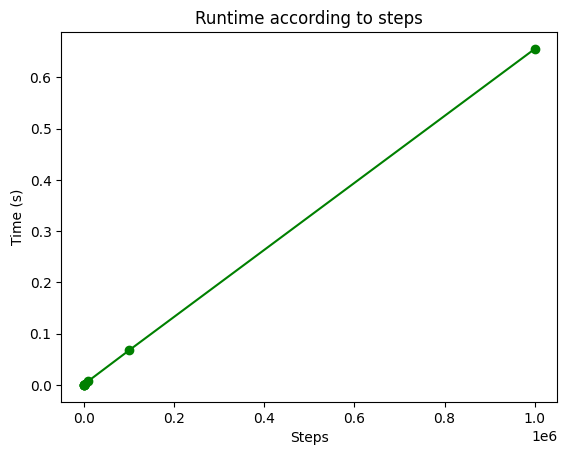

In [7]:
plt.plot(df["Step"],df["Time (s)"],"-o", color ="green") #Generamos la grafica
plt.title("Runtime according to steps") #Titulo
plt.xlabel("Steps") # Eje x
plt.ylabel("Time (s)") # Eje y


# Ejercicio II: Minimización

a. Encontrar el mínimo de la función mediante programación:
$𝑓(𝑥)=3(𝑥+2)^2+(𝑥+4)−25e^x$


b. Calcular el tiempo de solución para diferentes pasos de recorrido en el intervalo de búsqueda (-10,10).


        Pasos = [100, 1000, 10000, 50000,100000, 500000,1000000, 5000000] 


c. Graficar pasos vs tiempo de ejecución de la rutina.

In [8]:
np.exp(x)

array([1.00000000e+00, 1.35395549e+00, 1.83319548e+00, 2.48206508e+00,
       3.36060565e+00, 4.55011049e+00, 6.16064708e+00, 8.34124196e+00,
       1.12936704e+01, 1.52911270e+01, 2.07035054e+01, 2.80316249e+01,
       3.79535725e+01, 5.13874480e+01, 6.95763174e+01, 9.42032371e+01,
       1.27546990e+02, 1.72692948e+02, 2.33818566e+02, 3.16579931e+02,
       4.28635137e+02, 5.80352898e+02, 7.85771994e+02, 1.06390031e+03,
       1.44047367e+03, 1.95033723e+03, 2.64066981e+03, 3.57534939e+03,
       4.84086395e+03, 6.55431433e+03, 8.87424989e+03, 1.20153394e+04,
       1.62682347e+04, 2.20264658e+04, 2.98228543e+04, 4.03788175e+04,
       5.46711217e+04, 7.40222655e+04, 1.00222853e+05, 1.35697282e+05,
       1.83728081e+05, 2.48759644e+05, 3.36809486e+05, 4.56025054e+05,
       6.17437627e+05, 8.35983066e+05, 1.13188386e+06, 1.53252038e+06,
       2.07496438e+06, 2.80940942e+06, 3.80381532e+06, 5.15019664e+06,
       6.97313703e+06, 9.44131718e+06, 1.27831233e+07, 1.73077800e+07,
      

# Solución

(a)

In [24]:
def function(x):
    return 3*(x+2)**2+(x+4)-25*np.exp(x)

def run_code(i):
    
    x = np.linspace(-10,10,i) 
    
    value = np.inf
    count = 0 
    
    for a1 in x: 
        count +=1
        val_fun = function(a1)
        if val_fun < value:
            value = val_fun
            parameters = [a1, value]
    #print("Solution =",  parameters)
            
if __name__ == "__main__":
    steps = [100, 1000, 10000, 50000,100000, 500000,1000000, 5000000] 
    time_list = [] 
    for i in steps: 
        start_time =  time.perf_counter() 
        run_code(i) 
        total_time =  time.perf_counter() - start_time 
        time_list.append(total_time)
    
    df = pd.DataFrame({"Steps": steps, "Time (s)": time_list})
    display(df)
print(time_list)


[0.00037400000292109326, 0.0022926999954506755, 0.021951499998976942, 0.10779090000141878, 0.22098859999823617, 1.102886499997112, 2.279033300001174, 11.006641100000707]


(b)

In [25]:
df = pd.DataFrame({"Steps": steps, "Time (s)": time_list})

df

,Steps,Time (s)
0,100,0.000374
1,1000,0.002293
2,10000,0.021951
3,50000,0.107791
4,100000,0.220989
5,500000,1.102886
6,1000000,2.279033
7,5000000,11.006641


(c)

Text(0, 0.5, 'Time (s)')

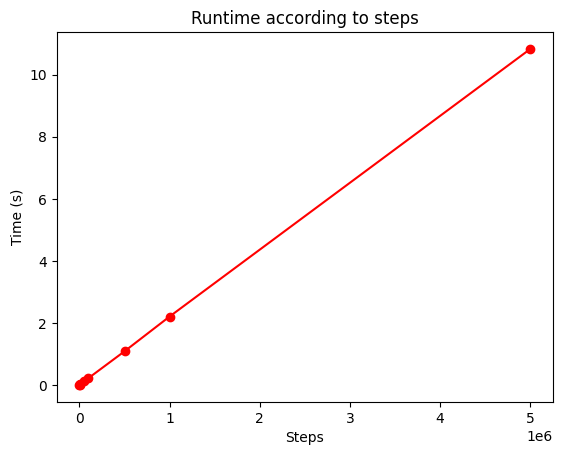

In [11]:
plt.plot(df["Step"],df["Time (s)"],"-o", color ="red")
plt.title("Runtime according to steps")
plt.xlabel("Steps")
plt.ylabel("Time (s)")


<div class="titulo-capitulo" style="background-color: darkblue; color: white;">
    <br>
    <h1 class="centrado">I. Fuerza bruta: Multiparámetro (o varias variables)</h1> 
    <br>
</div>

# Ejercicio I: Empresa Automotriz

a. Una empresa automotriz está diseñando un motor y desea determinar la combinación óptima de presión de combustión (en PSI) y relación de mezcla aire-combustible para maximizar la eficiencia de combustible. La función que describe la eficiencia de combustible en millas por galón (MPG) en función de la presión y la relación de mezcla es:

$f(x) = 25-x^2-y^2$

Donde, x es la presión de combustión y es la relación de mezcla aire-combustible.
Resuelva y grafique. 

In [12]:
start_time =  time.perf_counter()
def function(x,y):
    return  25 - x**2 - y**2    

x = np.linspace(-10,10,1000)
y = x
cost = -np.inf
count = 0

for a1 in x:
    for a2 in y:
        count +=1
        cost_fun = function(a1,a2)
        if cost_fun > cost:
            cost = cost_fun
            parameters = [a1,a2]
total_time =  time.perf_counter() - start_time
print("total time =", total_time)
print("parameters =", cost, parameters, count)


total time = 0.7796985000022687
parameters = 24.999799599399196 [-0.010010010010010006, -0.010010010010010006] 1000000


In [13]:
%matplotlib notebook 

from mpl_toolkits import mplot3d

X,Y = np.meshgrid(x,y)
Z=function(X,Y)

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot_wireframe(X,Y,Z)
ax.plot_surface(X,Y,Z,cmap="viridis")
plt.savefig("Graphic_3d.png")
plt.show()


<IPython.core.display.Javascript object>

b. Calcular el tiempo de solución para diferentes pasos de recorrido en el intervalo de búsqueda (-10,10). Entregar los tiempos de ejecución en un archivo csv.


        Pasos = [100, 1000, 10000]

In [14]:
def function(x,y):
    return  25 - x**2 - y**2 

def run_code(i):
    x = np.linspace(-10,10,i)
    y = x
    cost = -np.inf
    count = 0
    for a1 in x:
        for a2 in y:
            count +=1
            cost_fun = function(a1,a2)
            if cost_fun > cost:
                cost = cost_fun
                parameters = [a1,a2]
                
if __name__ == "__main__":
    steps = [100, 1000, 10000]# Opcional: probar solo pc con ram superior a 8 GB. [50000,100000, 500000,1000000, 5000000] 
    time_list = [] 
    
    for i in steps: 
        start_time =  time.perf_counter() 
        run_code(i) 
        total_time =  time.perf_counter() - start_time 
        time_list.append(total_time)


In [15]:
df = pd.DataFrame()

df["Step"] = steps 
df["Time (s)"] = time_list

df.to_csv("Times.csv", index=False, sep =";")
df

,Step,Time (s)
0,100,0.006970
1,1000,0.608332
2,10000,61.906960


c. Graficar pasos vs tiempo de ejecución de la rutina.

In [16]:
plt.plot(df["Step"],df["Time (s)"],"-o", color ="purple")
plt.title("Runtime according to steps")
plt.xlabel("Steps")
plt.ylabel("Time (s)")

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Time (s)')

# Ejercicio II: Compañia de Energía

Una compañía de energía renovable está diseñando un nuevo parque híbrido que combina energía solar y eólica. La compañía busca optimizar la configuración de sus paneles solares y turbinas eólicas para maximizar la eficiencia energética total del parque. La eficiencia energética del parque, medida en términos de la energía generada por metro cuadrado, está dada por la función:
$𝑓(𝑥,y,z)=𝑥^2+3(𝑦^2 )−𝑧𝑥$

Donde:
    
   𝑥 representa la densidad de paneles solares por metro cuadrado (unidades/m²).
    
   𝑦 representa la densidad de turbinas eólicas por metro cuadrado (unidades/m²).
    
   𝑧 representa la distancia promedio en metros entre la infraestructura del parque y la estación de conexión a la red eléctrica.
    
Resuelva y grafique.

In [17]:
steps = [100]
time_list = [] 

def function(x,y,z):
    return  x**2 + (y**2)-z*x 

def run_code(i):
    x = np.linspace(-10,20,i)
    y = x
    z = y
    cost = -np.inf
    count = 0
    for a1 in x:
        for a2 in y:
            for a3 in z:
                count +=1
                cost_fun = function(a1,a2,a3)
                if cost_fun > cost:
                    cost = cost_fun
                    parameters = [a1,a2,a3]
    print("parameters =", cost, parameters, count)

for i in steps: 
    start_time =  time.perf_counter() 
    run_code(i) 
    total_time =  time.perf_counter() - start_time 
    time_list.append(total_time)
print("total time =", total_time)

parameters = 1000.0 [20.0, 20.0, -10.0] 1000000
total time = 0.6863777999969898


In [18]:
%matplotlib

from mpl_toolkits import mplot3d

X,Y = np.meshgrid(x,y)
Z=function(X,Y,Z)

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot_wireframe(X,Y,Z)
ax.plot_surface(X,Y,Z,cmap="viridis")
plt.savefig("Graphic_3d_2.png")
plt.show()


Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>